## Modelado de opiniones y su impacto en la generación de consensos y disensos en una plataforma de CrowdSourcing

El objetivo de la simulación es dilucidar el funcionamiento de las dinámicas de opinión en una plataforma de CrowdSourcing donde las personas expresan sus opiniones y votan las expresadas por otros bajo una serie de condiciones especificadas por el contexto de la plataforma.

In [1]:
import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = [100, 200, 500, 1000] # Cantidad de agentes que quiero en la muestra.
QOpinionesExpuestas = 5 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 15 # Cantidad de veces maxima que se muestra una opinion

# Agentes

In [2]:

#<<<<<< Agente Nulo >>>>>>

class AgenteNulo (object):
    def __init__ (self, tipo,ID):
        self.Oi = self.set_Oi (tipo)
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto
        self.Valencias = []
    
    def __str__ (self):
        return "Despues lo seteo"
    
    def set_Oi (self, tipo):
        if tipo != "uniforme" and tipo != "normal":
            raise Exception("El tipo de opinion solo puede ser ""uniforme""o ""normal")
            
        if tipo == "uniforme":
            opinion = random.uniform (-1,1)
        # if tipo == "normal": 
            # opinion = ¤SETEAR LA OPINION NORMAL ##******************************************************************** 
        return opinion
    
    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)   

    def append_Valencias (self, Valencias):
        self.Valencias.append (Valencias) 

    def algvotar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar 

    def algvotarneg (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 0             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 3
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V > Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar
    
    def ListaVotos (self, VotosPos, VotosNeg):
        votos = VotosPos * [1] + VotosNeg * [-1]
        return votos
    
    def votar (self, ideas): # Modelo de votacion aleatoria nulo
        self.IdeasVistas.append (ideas)
        Votara = ideas.sample (n = QIdeasAVotar)
        votos = self.ListaVotos(VotosPos, VotosNeg)
        vota = []
        for i in Votara.index:
            vota.append (i)
        self.IdeasVotadas.append (vota)
        self.Valencias.append (votos)
        devuelve = pd.DataFrame(votos, vota)
        return devuelve

    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []
        
        
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Agente Determinista ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

class AgenteDeterminista (AgenteNulo):
        
        def votar (self, ideas): # Aca solo elimino el tipo de votacion que va a quedar definido por la herencia de clase
            self.IdeasVistas.append (ideas)
            ideas2 = ideas.copy ()
            vota = []
            votos = self.ListaVotos(VotosPos, VotosNeg) # Esta funcion deberia tomar las variables globales que le paso a cada simulacion sobre cuantos votos quiero que tenga c/u nose si va a funcionar
            for i in votos:
                if i == 1:
                    va = self.algvotar (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
                if i == -1:
                    va = self.algvotarneg (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
            self.IdeasVotadas.append (vota)
            self.Valencias.append (votos)
            devuelve = pd.DataFrame(votos, vota)
            return devuelve

    
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Agente Probabilistico ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#
        
class AgenteProbabilistico (AgenteNulo):
    pass
    # FALTA ARMAR ESTO ################################################################################


        

### Metodos se seleccion de ideas a votar

In [3]:
def metodo_de_seleccion (lista, tipo): # 'menos vistas', 'xxxxx', 'xxxxxx'
    if tipo == "menos vistas":
        lista.sort_values(by='Vistas', inplace=True)
        Devuelve = lista.iloc[:QOpinionesExpuestas, :2]
        return Devuelve
        

### Simulacion Nula

-------------------------------------------------------------------------------------
Muestra N: 100
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


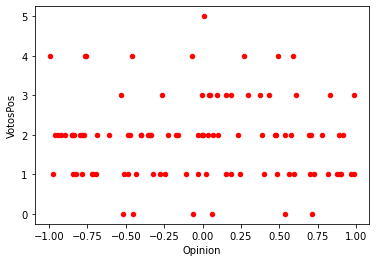

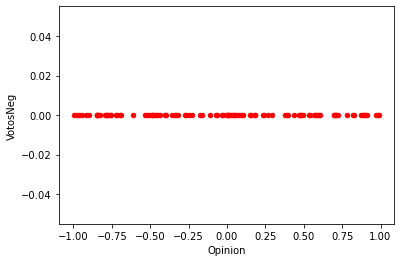

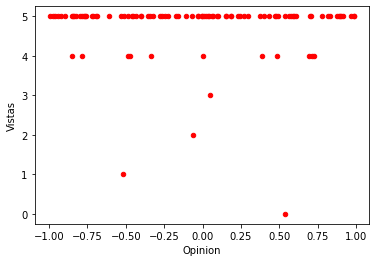

-------------------------------------------------------------------------------------
Muestra N: 200
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


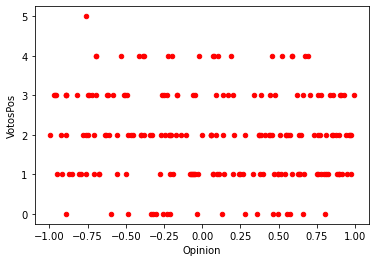

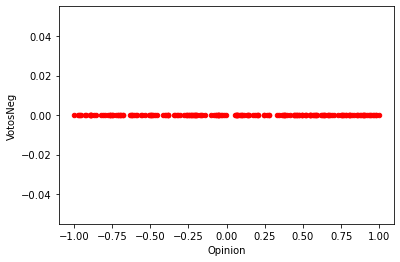

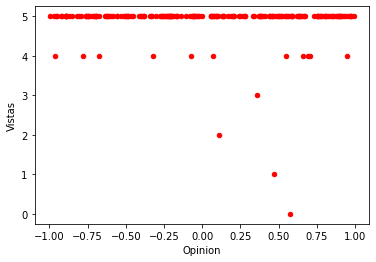

-------------------------------------------------------------------------------------
Muestra N: 500
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


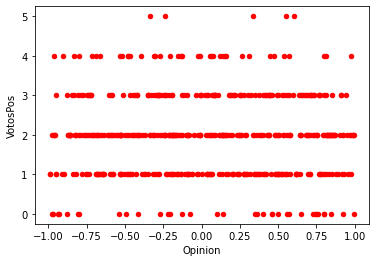

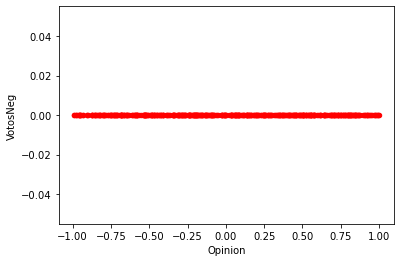

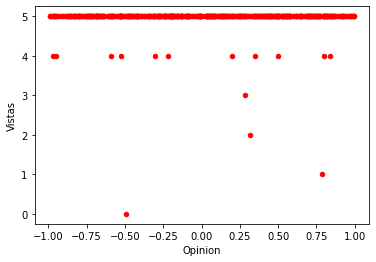

-------------------------------------------------------------------------------------
Muestra N: 1000
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


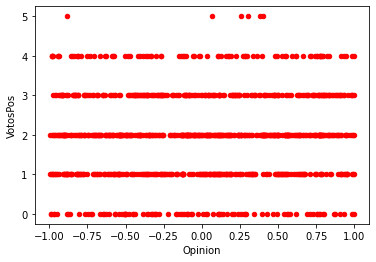

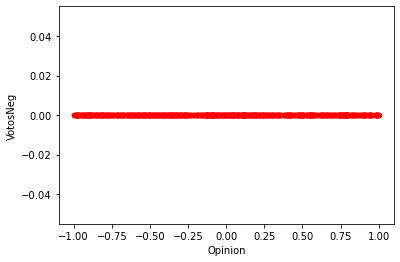

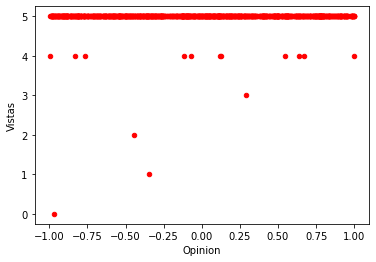

In [28]:
#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Creo la muestra ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

for q in TamañoDeLaMuestra:
    Muestra_Completa = {}
    for k in range (1,q):
        Muestra_Completa [k] = AgenteNulo ("uniforme",k*111)


    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Variables que hay que definir ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    VotosPos = 2
    VotosNeg = 0
    
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
    DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'VotosPos', 'VotosNeg', 'Vistas'])
    MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
    OpinanNoVotan = 0
    TiempoSimulacion = 0
    QIdeasAVotar = VotosPos + VotosNeg

    for i in Muestra_Simulacion:
        ParticipanteActual = i
        
        if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
            DataSave.at [OpinanNoVotan] = Muestra_Simulacion.get(i).get_ID(), Muestra_Simulacion.get(i).get_Oi(), 0, 0, 0
            OpinanNoVotan +=1
        
        else:
            OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
            OpinionesParaVotar =  metodo_de_seleccion (OpinionesFiltradas, "menos vistas") # Creo un dataframe con las ideas que va a ver el sujeto
            DataSave.at [i] = Muestra_Simulacion.get(i).get_ID(), Muestra_Simulacion.get(i).get_Oi(), 0, 0, 0
            VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
            
            for i in VotoActual.index:
                
                if VotoActual.loc[i].at[0] == 1:
                    DataSave.at [i,'VotosPos'] = DataSave.at [i,'VotosPos'] + 1 # Le sumo un voto a la idea.
                
                if VotoActual.loc[i].at[0] == -1:
                    DataSave.at [i,'VotosNeg'] = DataSave.at [i,'VotosNeg'] + 1 # Le sumo un voto a la idea. 
            
            for i in OpinionesParaVotar.index:
                OpinionI = i
                DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas
                
                # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
                CopiaOpiniones = OpinionesParaVotar.index.tolist()
                CopiaOpiniones.remove(i)
                MinutoAMinuto.at [TiempoSimulacion] = Muestra_Simulacion.get(ParticipanteActual).get_ID(), Muestra_Simulacion.get(ParticipanteActual).get_Oi(), i, OpinionesParaVotar.at [i,'Opinion'], CopiaOpiniones, 0, Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion']) 
                if i in VotoActual.index:
                    for i in VotoActual.index:
                        if i == OpinionI:
                            MinutoAMinuto.at [TiempoSimulacion,'Voto'] = VotoActual.at [i,0]  
                TiempoSimulacion +=1

    ##### Visualizo la data
    print ("-------------------------------------------------------------------------------------")
    print ("Muestra N: " + str(q))
    print ("Opiniones XXXX, con una distribucion XXXX [-1,1]")
    print ("Algoritmo XXXX, del conjunto de XXXX")
    #print (DataSave.sort_values(by=['Votos'], ascending=False))
    DataSave.plot(kind='scatter',x='Opinion',y='VotosPos',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='VotosNeg',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='red')
    #plt.yticks(range(5))
    plt.show()

